<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/INFORMATION_GAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("psych","infotheo"))
library(psych)
library(infotheo)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(readxl)


In [ ]:
data <- read_excel("/content/gss932013.xlsx")


In [ ]:
str(data)

tibble [989 × 19] (S3: tbl_df/tbl/data.frame)
 $ id      : num [1:989] 1 2 3 5 6 7 8 9 10 12 ...
 $ sitlab  : chr [1:989] "A tiempo completo" "A tiempo completo" "A tiempo completo" "Retirado" ...
 $ ecivil  : chr [1:989] "Divorciado" "Soltero" "Divorciado" "Soltero" ...
 $ edadboda: chr [1:989] "20" "No procede" "25" "No procede" ...
 $ hermanos: chr [1:989] "3" "2" "2" "1" ...
 $ hijos   : chr [1:989] "1" "0" "0" "0" ...
 $ edad    : chr [1:989] "43" "44" "43" "78" ...
 $ mesnaz  : chr [1:989] "Mayo" "Agosto" "Febrero" "Octubre" ...
 $ zodiaco : chr [1:989] "Tauro" "Virgo" "Acuario" "Libra" ...
 $ educ    : chr [1:989] "11" "16" "16" "17" ...
 $ titestud: chr [1:989] "Medio" "Diploma universitario" "Diploma universitario" "Licenciado" ...
 $ titpadre: chr [1:989] "No procede" "Elemental" "Medio" "Medio" ...
 $ titmadre: chr [1:989] "Elemental" "Elemental" "Elemental" "Bachillerato" ...
 $ sexo    : chr [1:989] "Hombre" "Hombre" "Mujer" "Mujer" ...
 $ raza    : chr [1:989] "Blanca" "N

In [ ]:
head(data)

id,sitlab,ecivil,edadboda,hermanos,hijos,edad,mesnaz,zodiaco,educ,titestud,titpadre,titmadre,sexo,raza,vida,píldora,cachete,periódic
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A tiempo completo,Divorciado,20,3,1,43,Mayo,Tauro,11,Medio,No procede,Elemental,Hombre,Blanca,Rutinaria,No Procede,No Procede,No Procede
2,A tiempo completo,Soltero,No procede,2,0,44,Agosto,Virgo,16,Diploma universitario,Elemental,Elemental,Hombre,Negra,Excitante,En Desacuerdo,Completamenete de Acuerdo,Diariamente
3,A tiempo completo,Divorciado,25,2,0,43,Febrero,Acuario,16,Diploma universitario,Medio,Elemental,Mujer,Blanca,Excitante,No Procede,No Procede,No Procede
5,Retirado,Soltero,No procede,1,0,78,Octubre,Libra,17,Licenciado,Medio,Bachillerato,Mujer,Blanca,Excitante,Completamenete de Acuerdo,De Acuerdo,Diariamente
6,Retirado,Casado,25,2,2,83,Marzo,Piscis,11,Medio,Elemental,Elemental,Hombre,Blanca,Rutinaria,No Procede,No Procede,No Procede
7,A tiempo completo,Casado,22,2,2,55,Octubre,Libra,12,Medio,Elemental,Elemental,Mujer,Blanca,Rutinaria,No Procede,No Procede,No Procede


In [ ]:
data$vida <- as.factor(data$vida)


In [ ]:
table(data$vida)


 Aburrida Excitante Rutinaria 
       64       470       455 

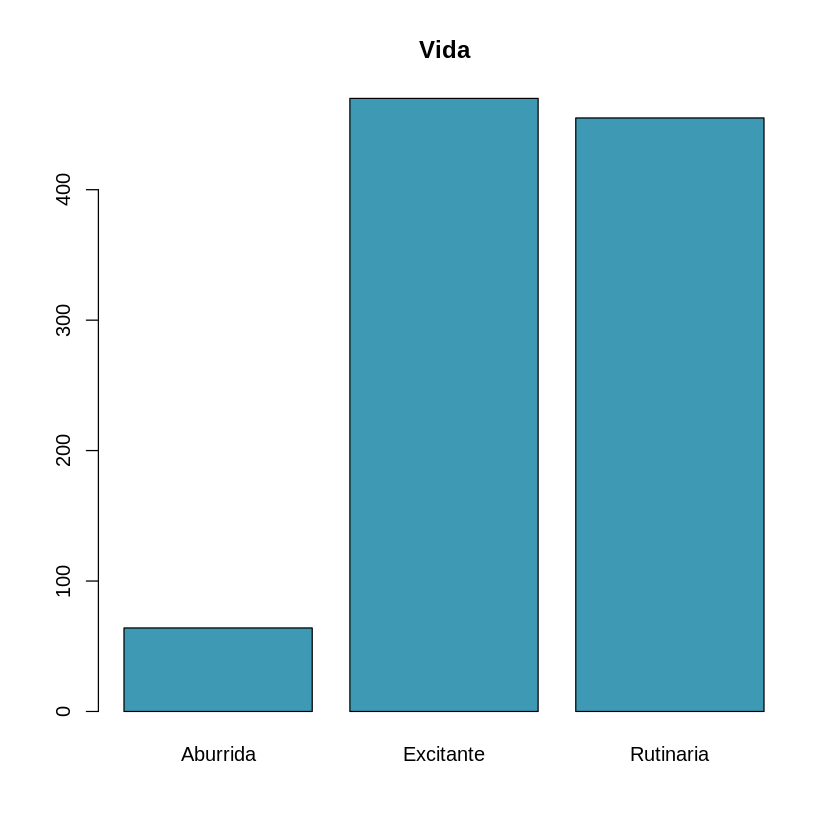

In [ ]:
barplot(table(data$vida), main="Vida",col="#3E9AB4")

In [ ]:
prop.table(table(data$vida))


  Aburrida  Excitante  Rutinaria 
0.06471183 0.47522750 0.46006067 

In [ ]:
entropia_VIDA <- entropy(data$vida)
natstobits(entropia_VIDA)
entropia_VIDA

[1] 1.280983

[1] 0.8879095

In [ ]:
log2(nlevels(data$vida))

[1] 1.584963

#Reduccion de Dimensionalidad

In [ ]:
install.packages(c("corrplot","psych","FactoMineR","factoextra","reshape2","RColorBrewer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘plyr’




#Creacion de tablas de contingencia y calculo de Information Gain sobre Vida


In [ ]:
table(data$vida,data$sitlab)

           
            A tiempo completo A tiempo parcial Ama de casa
  Aburrida                 15                6          11
  Excitante               261               45          51
  Rutinaria               228               44          61
           
            Desempleado, despedido Estudiante Otro Retirado
  Aburrida                       3          2    6       21
  Excitante                     13         21    8       54
  Rutinaria                     13          9   14       79
           
            Temporalmete desempleado
  Aburrida                         0
  Excitante                       17
  Rutinaria                        7

In [ ]:
install.packages("gmodels")
library("gmodels")
CrossTable(data$vida, data$sitlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$sitlab 
   data$vida |        A tiempo completo |         A tiempo parcial |              Ama de casa |   Desempleado, despedido |               Estudiante |                     Otro |                 Retirado | Temporalmete desempleado |                Row Total | 
-------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
    Aburrida |                       15 |                        6 |                       11 |                        3 |                        2 |                        6 |                      

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



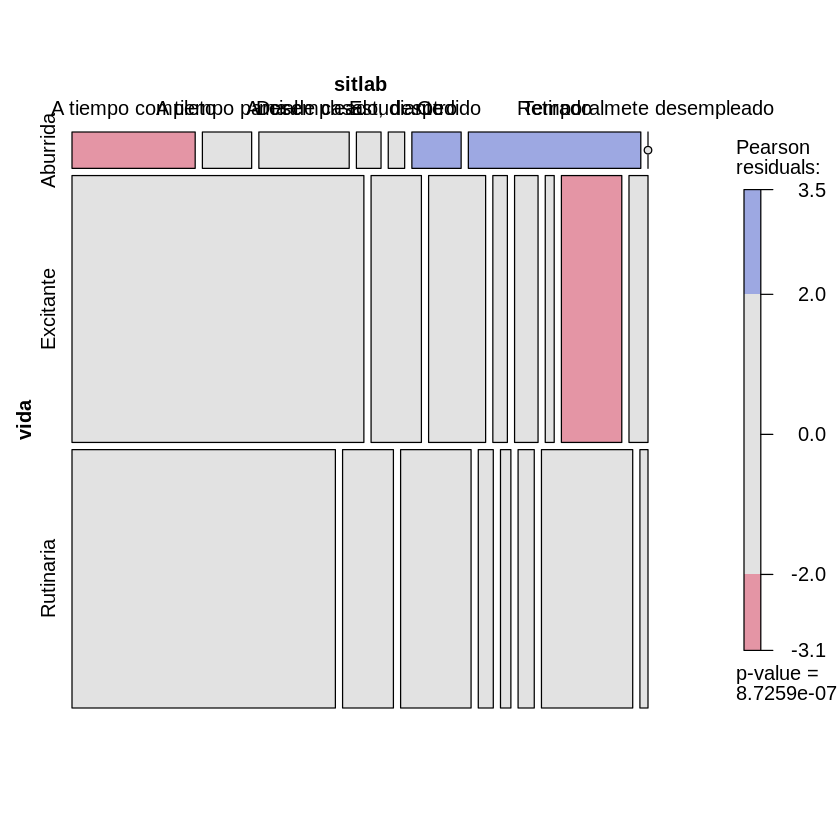

In [ ]:
install.packages("vcd")
library("vcd")
mosaic(~vida + sitlab,data=data,
       legend=TRUE, shade=TRUE)

In [ ]:
entroy<-natstobits(entropy(data$vida))
entroy_dadox<-natstobits(condentropy(data$vida,data$sitlab))
infogain<-entroy-entroy_dadox
entroy
entroy_dadox
infogain

[1] 1.280983

[1] 1.24244

[1] 0.03854251

In [ ]:
natstobits(mutinformation(data$sitlab,data$vida))

[1] 0.03854251

In [ ]:
table(data$vida,data$ecivil)

           
            Casado Divorciado No contesta Separado Soltero Viudo
  Aburrida      20         10           0        6      11    17
  Excitante    249         65           1        8     107    40
  Rutinaria    240         73           0       11      78    53

In [ ]:
install.packages("gmodels")
library("gmodels")
CrossTable(data$vida, data$ecivil)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$ecivil 
   data$vida |      Casado |  Divorciado | No contesta |    Separado |     Soltero |       Viudo |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
    Aburrida |          20 |          10 |           0 |           6 |          11 |          17 |          64 | 
             |       5.082 |       0.019 |       0.065 |      11.870 |       0.223 |      13.718 |             | 
             |       0.312 |       0.156 |       0.000 |       0.094 |       0.172 |       0.266 |       0.065 | 
             |       0.039 |       0.068 |       0.000 |       0.240 |       0.056 |       0.155 |             | 
             |       0.020 |    

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



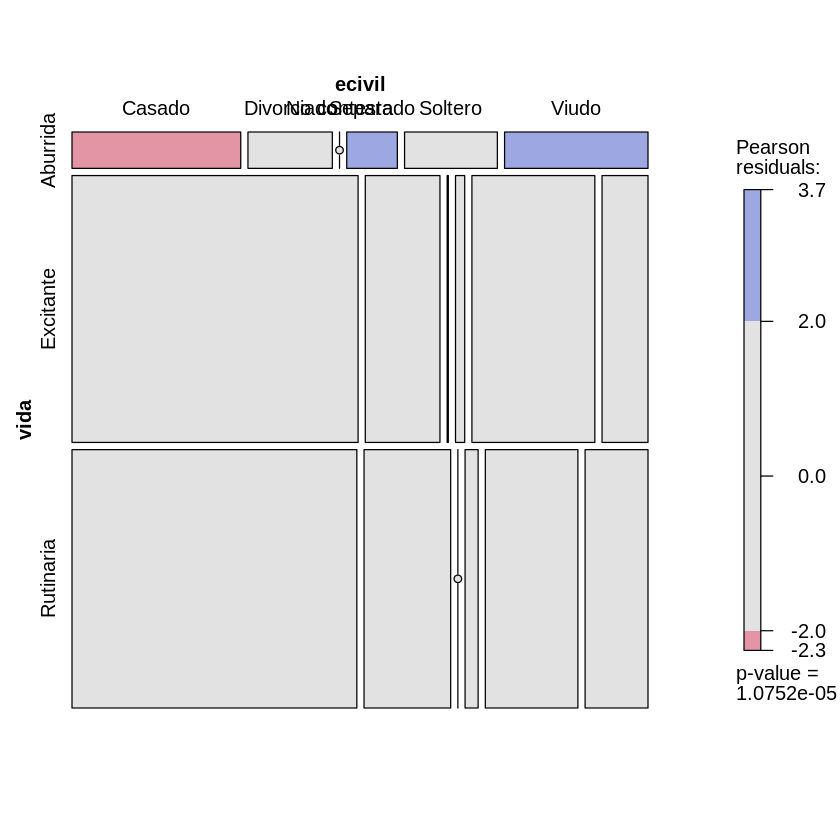

In [ ]:
install.packages("vcd")
library("vcd")
mosaic(~vida + ecivil,data=data,
       legend=TRUE, shade=TRUE)

In [ ]:
entroy<-natstobits(entropy(data$vida))
entroy_dadox<-natstobits(condentropy(data$vida,data$ecivil))
infogain<-entroy-entroy_dadox
entroy
entroy_dadox
infogain

[1] 1.280983

[1] 1.256209

[1] 0.02477406

In [ ]:
natstobits(mutinformation(data$ecivil,data$vida))

[1] 0.02477406

           
              0   1  10  11  12  13  14  15  16  17  19   2  21  22   3   4   5
  Aburrida    3  10   1   1   0   0   0   0   0   0   1   8   0   1  13   9   5
  Excitante  27  80   5   3   3   3   2   1   2   1   0 115   1   0  76  55  28
  Rutinaria  20  62   6   6   3   2   0   1   0   0   1  89   0   0  90  45  41
           
              6   7   8   9 No contesta No sabe
  Aburrida    4   4   3   1           0       0
  Excitante  26  14  14  11           2       1
  Rutinaria  32  21  17  18           0       1


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$hermanos 
   data$vida |           0 |           1 |          10 |          11 |          12 |          13 |          14 |          15 |          16 |          17 |          19 |           2 |          21 |          22 |           3 |           4 |           5 |           6 |           7 |           8 |           9 | No contesta |     No sabe |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
    Aburri

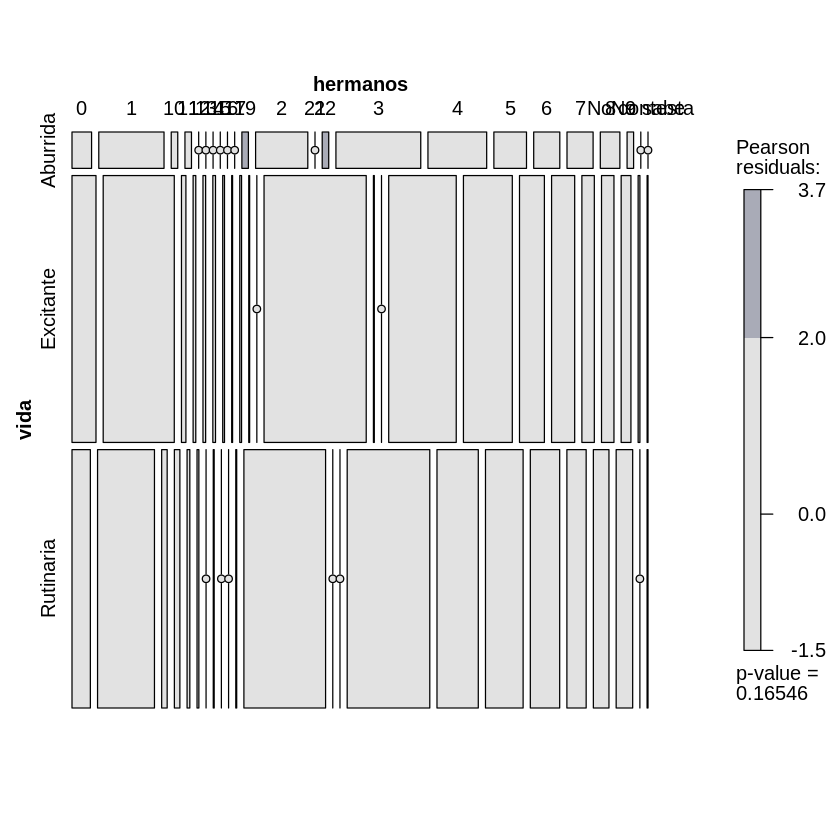

In [ ]:
table(data$vida,data$hermanos)

CrossTable(data$vida, data$hermanos)

mosaic(~vida + hermanos,data=data,
       legend=TRUE, shade=TRUE)

           
              0   1   2   3   4   5   6   7  NC Ocho o más
  Aburrida   12  10  17  11   4   4   2   0   0          4
  Excitante 148  69 119  67  37  19   2   1   2          6
  Rutinaria 131  76 123  67  33   9   7   3   0          6


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$hijos 
   data$vida |          0 |          1 |          2 |          3 |          4 |          5 |          6 |          7 |         NC | Ocho o más |  Row Total | 
-------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
    Aburrida |         12 |         10 |         17 |         11 |          4 |          4 |          2 |          0 |          0 |          4 |         64 | 
             |      2.478 |      0.000 |      0.003 |      0.279 |      0.130 |      1.797 |      2.331 |      0.259 |      0.129 |      8.489 |            | 
             |      0.188 |      0.156 |      0.266 |      0.172 |      0.062 |  

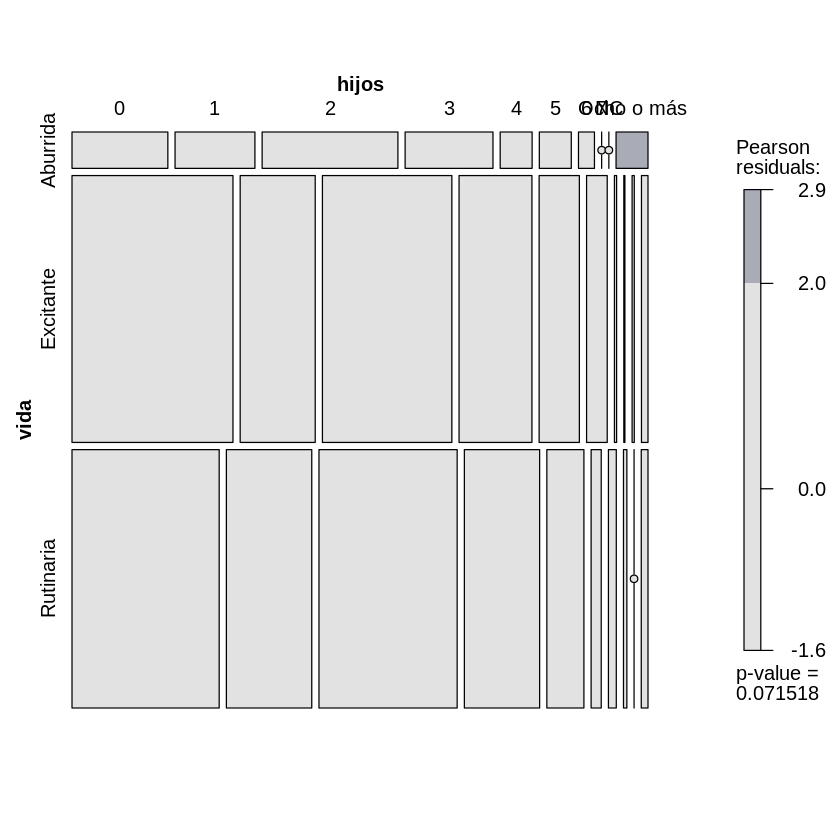

In [ ]:
table(data$vida,data$hijos)

CrossTable(data$vida, data$hijos)

mosaic(~vida + hijos,data=data,
       legend=TRUE, shade=TRUE)

           
            Abril Agosto Diciembre Enero Febrero Julio Junio Marzo Mayo
  Aburrida      6      5         5     9       4     5     3     6    7
  Excitante    38     47        31    37      44    40    45    38   38
  Rutinaria    40     44        36    43      30    45    41    55   25
           
            Noviembre Octubre Septiembre
  Aburrida          2       6          6
  Excitante        39      40         33
  Rutinaria        42      27         27


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$mesnaz 
   data$vida |      Abril |     Agosto |  Diciembre |      Enero |    Febrero |      Julio |      Junio |      Marzo |       Mayo |  Noviembre |    Octubre | Septiembre |  Row Total | 
-------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
    Aburrida |          6 |          5 |          5 |          9 |          4 |          5 |          3 |          6 |          7 |          2 |          6 |          6 |         64 | 
             |      0.059 |      0.237 |      0.025 |      1.823 |      0.217 |      0.117 |      1.322 |      0.026 |      1.347 |      2.116 |      0.345 |    

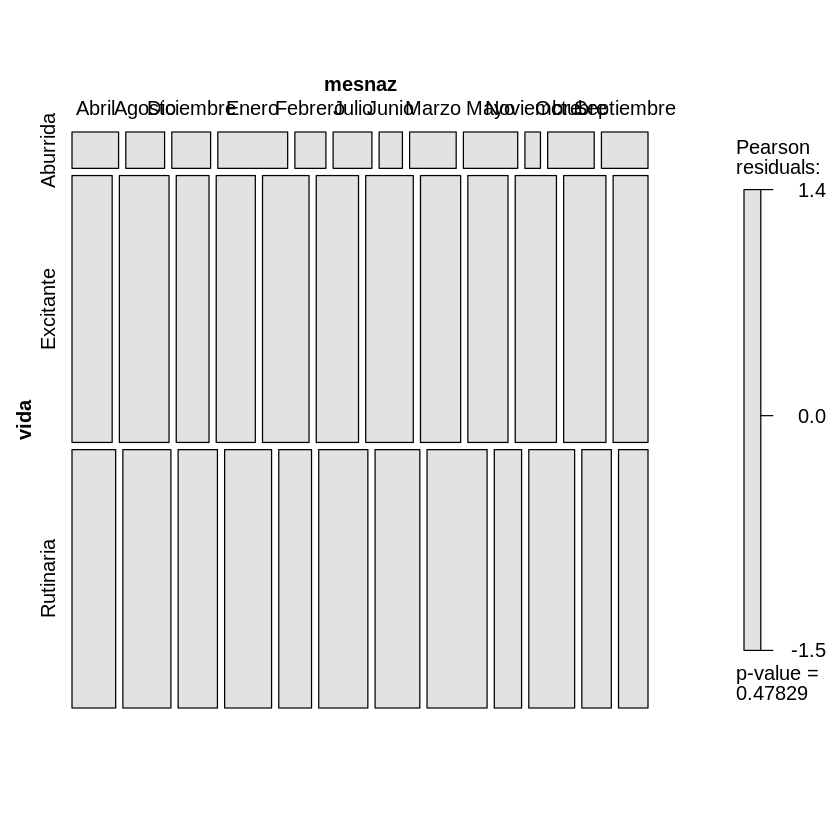

In [ ]:
table(data$vida,data$mesnaz)

CrossTable(data$vida, data$mesnaz)

mosaic(~vida + mesnaz,data=data,
       legend=TRUE, shade=TRUE)

           
            Acuario Aries Cáncer Capricornio Escorpio Géminis Leo Libra Piscis
  Aburrida        6     7      2           6        1       7   7     6      5
  Excitante      33    34     46          30       36      46  47    39     52
  Rutinaria      35    47     48          39       33      37  45    28     46
           
            Sagitario Tauro Virgo
  Aburrida          6     4     7
  Excitante        37    32    38
  Rutinaria        40    32    25


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$zodiaco 
   data$vida |     Acuario |       Aries |      Cáncer | Capricornio |    Escorpio |     Géminis |         Leo |       Libra |      Piscis |   Sagitario |       Tauro |       Virgo |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
    Aburrida |           6 |           7 |           2 |           6 |           1 |           7 |           7 |           6 |           5 |           6 |           4 |           7 |          64 | 
             |       0.306 |       0.299 |       2.856 |       0.271 |       2.751 |       0.237 |       0.055 |       0.

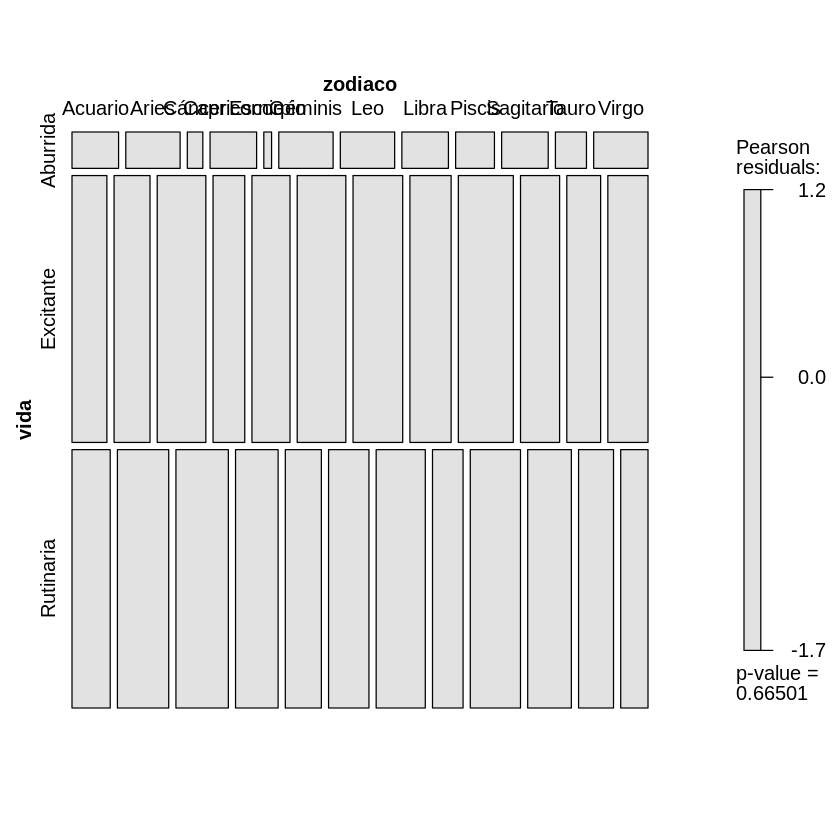

In [ ]:
table(data$vida,data$zodiaco)

CrossTable(data$vida, data$zodiaco)

mosaic(~vida + zodiaco,data=data,
       legend=TRUE, shade=TRUE)

           
              0  10  11  12  13  14  15  16  17  18  19   2  20   4   5   6   7
  Aburrida    1   3   5  24   5   3   1   1   0   1   1   1   0   1   1   1   2
  Excitante   0  15  23 121  39  54  27  84  23  27  13   1  12   0   1   3   6
  Rutinaria   1  20  27 144  44  54  21  51  10  17   2   1   4   3   2   3  10
           
              8   9 No sabe
  Aburrida    9   4       0
  Excitante   8  12       1
  Rutinaria  21  19       1


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$educ 
   data$vida |         0 |        10 |        11 |        12 |        13 |        14 |        15 |        16 |        17 |        18 |        19 |         2 |        20 |         4 |         5 |         6 |         7 |         8 |         9 |   No sabe | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
    Aburrida |         1 |         3 |         5 |        24 |         5 |         3 |         1 |         1 |         0 |         1 |         1 |         1 |         0 |         1 |

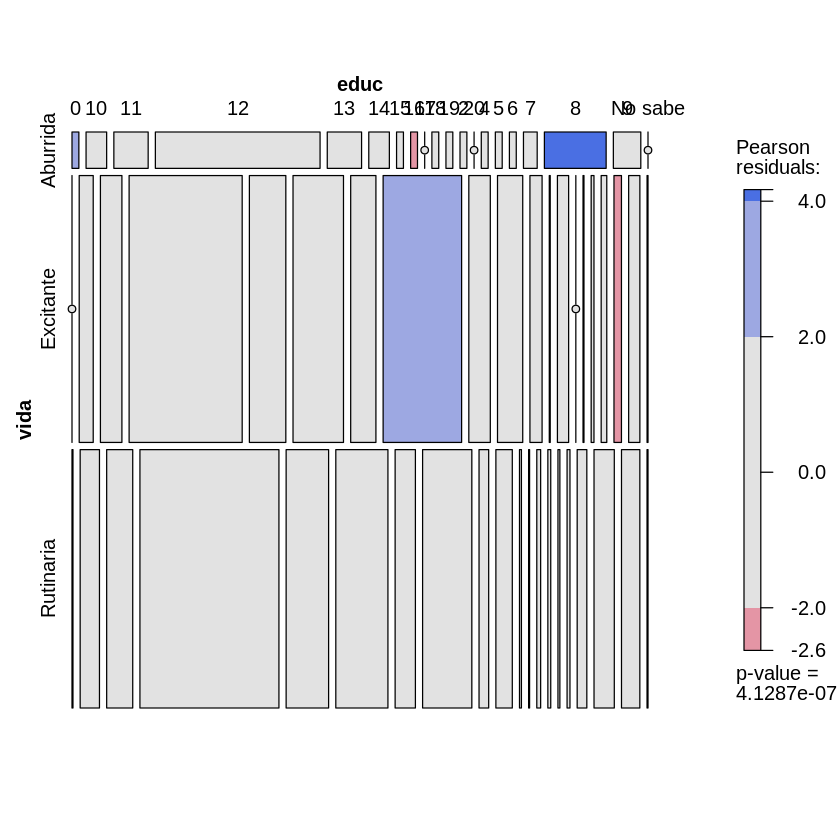

In [ ]:
table(data$vida,data$educ)

CrossTable(data$vida, data$educ)

mosaic(~vida + educ,data=data,
       legend=TRUE, shade=TRUE)

In [ ]:
entroy<-natstobits(entropy(data$vida))
entroy_dadox<-natstobits(condentropy(data$vida,data$educ))
infogain<-entroy-entroy_dadox
entroy
entroy_dadox
infogain

[1] 1.280983

[1] 1.210525

[1] 0.07045716

In [ ]:
natstobits(mutinformation(data$educ,data$vida))

[1] 0.07045716

           
            Hombre Mujer
  Aburrida      20    44
  Excitante    202   268
  Rutinaria    202   253


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$sexo 
   data$vida |    Hombre |     Mujer | Row Total | 
-------------|-----------|-----------|-----------|
    Aburrida |        20 |        44 |        64 | 
             |     2.016 |     1.513 |           | 
             |     0.312 |     0.688 |     0.065 | 
             |     0.047 |     0.078 |           | 
             |     0.020 |     0.044 |           | 
-------------|-----------|-----------|-----------|
   Excitante |       202 |       268 |       470 | 
             |     0.001 |     0.001 |           | 
             |     0.430 |     0.570 |     0.475 | 
             |     0.476 |     0.474 |           | 
             |     0.204 |     0.271 |           | 
-------------|-----------|-----------|-----

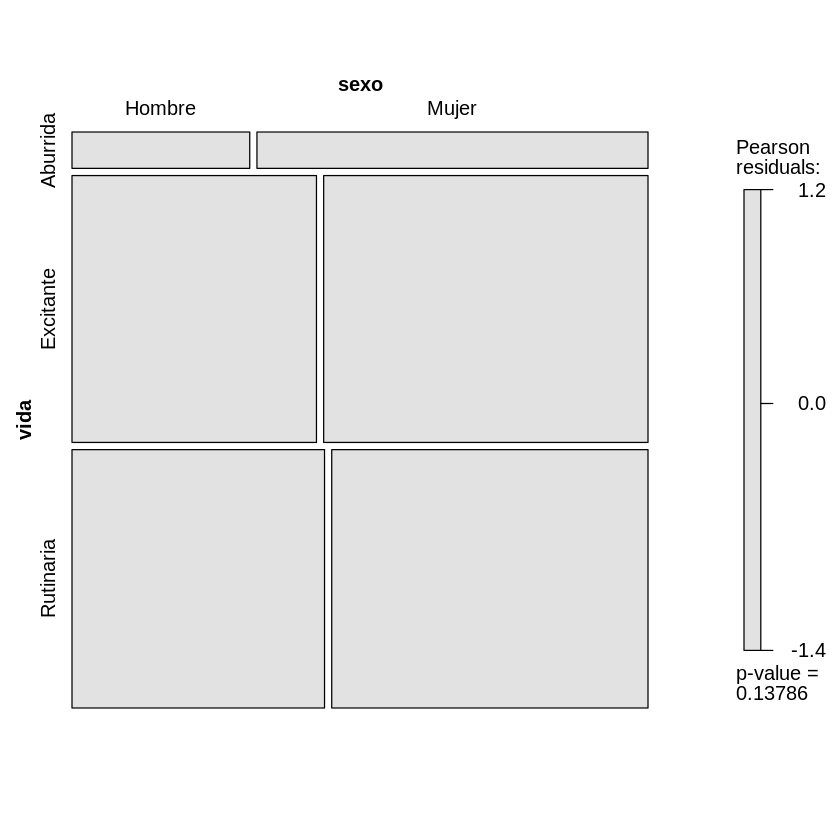

In [ ]:
table(data$vida,data$sexo)

CrossTable(data$vida, data$sexo)

mosaic(~vida + sexo,data=data,
       legend=TRUE, shade=TRUE)

           
            Blanca Negra Otra
  Aburrida      54     4    6
  Excitante    400    49   21
  Rutinaria    376    60   19


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$raza 
   data$vida |    Blanca |     Negra |      Otra | Row Total | 
-------------|-----------|-----------|-----------|-----------|
    Aburrida |        54 |         4 |         6 |        64 | 
             |     0.002 |     1.500 |     3.070 |           | 
             |     0.844 |     0.062 |     0.094 |     0.065 | 
             |     0.065 |     0.035 |     0.130 |           | 
             |     0.055 |     0.004 |     0.006 |           | 
-------------|-----------|-----------|-----------|-----------|
   Excitante |       400 |        49 |        21 |       470 | 
             |     0.078 |     0.411 |     0.034 |           | 
             |     0.851 |     0.104 |     0.045 |     0.475 | 
             | 

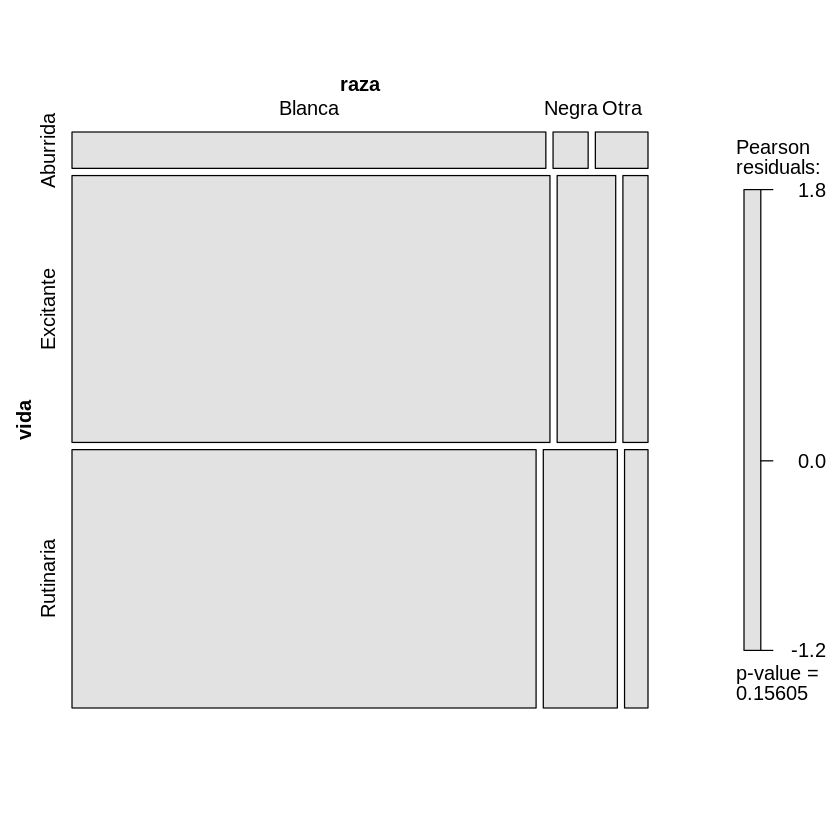

In [ ]:
table(data$vida,data$raza)

CrossTable(data$vida, data$raza)

mosaic(~vida + raza,data=data,
       legend=TRUE, shade=TRUE)

           
            Completamenete de Acuerdo Completamente en Desacuerdo De Acuerdo
  Aburrida                          8                          10         10
  Excitante                        83                          41         65
  Rutinaria                        55                          41         63
           
            En Desacuerdo No Contesta No Procede No Sabe
  Aburrida              9           0         25       2
  Excitante            52           1        215      13
  Rutinaria            48           2        238       8


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$píldora 
   data$vida |   Completamenete de Acuerdo | Completamente en Desacuerdo |                  De Acuerdo |               En Desacuerdo |                 No Contesta |                  No Procede |                     No Sabe |                   Row Total | 
-------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|
    Aburrida |                           8 |                          10 |                          10 |                           9 |                           0 |                          25 |         

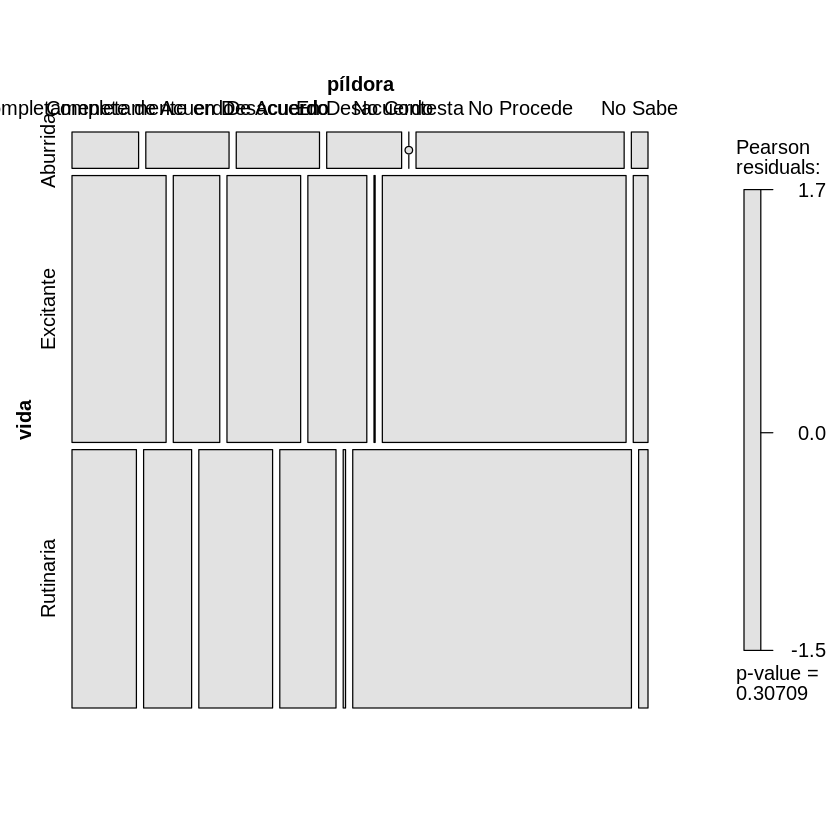

In [ ]:
table(data$vida,data$`píldora`)

CrossTable(data$vida, data$`píldora`)

mosaic(~vida + `píldora`,data=data,
       legend=TRUE, shade=TRUE)

           
            Completamenete de Acuerdo Completamente en Desacuerdo De Acuerdo
  Aburrida                         13                           2         21
  Excitante                        73                          27         97
  Rutinaria                        55                          12        116
           
            En Desacuerdo No Contesta No Procede No Sabe
  Aburrida              2           0         25       1
  Excitante            54           1        215       3
  Rutinaria            32           0        238       2


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$cachete 
   data$vida |   Completamenete de Acuerdo | Completamente en Desacuerdo |                  De Acuerdo |               En Desacuerdo |                 No Contesta |                  No Procede |                     No Sabe |                   Row Total | 
-------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|
    Aburrida |                          13 |                           2 |                          21 |                           2 |                           0 |                          25 |         

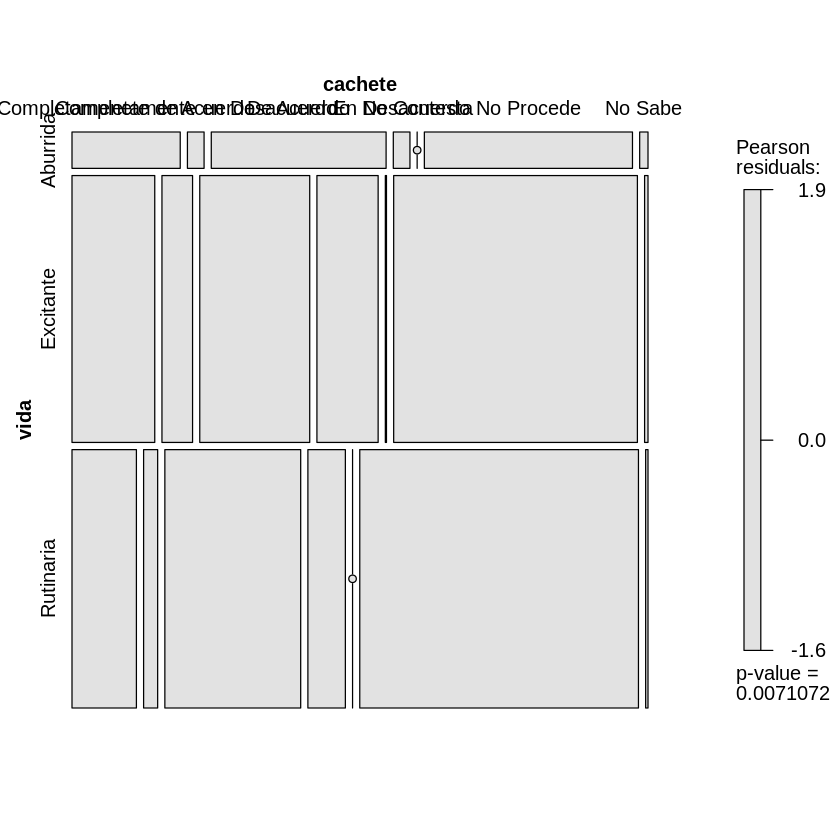

In [ ]:
table(data$vida,data$cachete)

CrossTable(data$vida, data$cachete)

mosaic(~vida + cachete,data=data,
       legend=TRUE, shade=TRUE)

           
            Diariamente Menos de una vez a la semana No Contesta No Procede
  Aburrida           11                            4           0         25
  Excitante         133                           19           1        215
  Rutinaria          97                           19           0        238
           
            Nunca Una vez a la semana Varios días a la semana
  Aburrida      7                   6                      11
  Excitante    14                  28                      60
  Rutinaria     7                  30                      64


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  989 

 
             | data$periódic 
   data$vida |                  Diariamente | Menos de una vez a la semana |                  No Contesta |                   No Procede |                        Nunca |          Una vez a la semana |      Varios días a la semana |                    Row Total | 
-------------|------------------------------|------------------------------|------------------------------|------------------------------|------------------------------|------------------------------|------------------------------|------------------------------|
    Aburrida |                           11 |                            4 |                            0 |                           25 |                            7 |                 

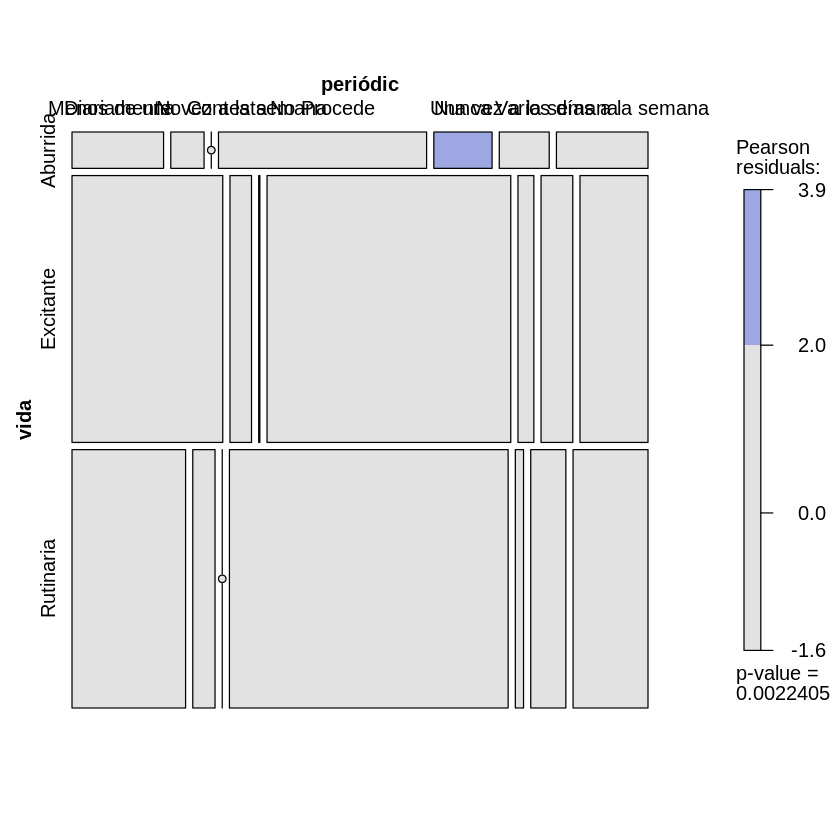

In [ ]:
table(data$vida,data$`periódic`)

CrossTable(data$vida, data$`periódic`)

mosaic(~vida + `periódic`,data=data,
       legend=TRUE, shade=TRUE)

In [ ]:
entroy<-natstobits(entropy(data$vida))
entroy_dadox<-natstobits(condentropy(data$vida,data$`periódic`))
infogain<-entroy-entroy_dadox
entroy
entroy_dadox
infogain

[1] 1.280983

[1] 1.262624

[1] 0.01835887

#Pruebas Chi square



In [ ]:
#1 Educacion

chisq.test(data$vida,data$educ)

#2 Sit Laboral
chisq.test(data$vida,data$sitlab)
#3 Estado civil
chisq.test(data$vida,data$ecivil)
#4 Periodico
chisq.test(data$vida,data$`periódic`)

Warning message in chisq.test(data$vida, data$educ):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$vida and data$educ
X-squared = 97.372, df = 38, p-value = 4.129e-07


Warning message in chisq.test(data$vida, data$sitlab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$vida and data$sitlab
X-squared = 54.98, df = 14, p-value = 8.726e-07


Warning message in chisq.test(data$vida, data$ecivil):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$vida and data$ecivil
X-squared = 41.119, df = 10, p-value = 1.075e-05


Warning message in chisq.test(data$vida, data$periódic):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$vida and data$periódic
X-squared = 30.633, df = 12, p-value = 0.002241


In [ ]:
natstobits(mutinformation(data$`periódic`,data$vida))

[1] 0.01835887

#Conclusion:
Con base al analisis hecho podemos decir que lo que tuvo el mayor information gain sobre el estado de vida fue la educacion de la persona con un information gain de 0.0704571554979616, los 4 factores con mayor importancia sobre sobre la variable vida son:
 * Educacion: 0.0704571554979616
 * Situacion laboral: 0.0385425102705705
 * Estado Civil: 0.0247740560103025
 * Periodico: 0.0183588652239088